In [1]:
import torch
import torch.nn as nn
import torch_geometric
from src.layer.encoders import TrigonometricEncoder
from src.model.wavegc import WaveGCNet
from src.transforms.spectral import WaveGCSpectralTransform

<Axes: >

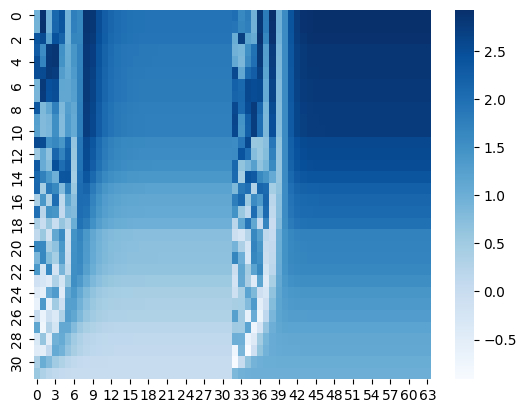

In [2]:
import numpy as np 
import seaborn as sns

eigvs = torch.tensor(np.random.uniform(0,2, (1, 32) ),
                      dtype=torch.float32).sort(
    axis=1,descending=True).values
d = 64

pe = TrigonometricEncoder(d, 100, project=False)
pos = pe(eigvs)
sns.heatmap(pos.detach(), cmap='Blues')

In [3]:
from torch_geometric.datasets import Amazon

dataset = Amazon(root='/tmp/Amazon', name='Photo')

In [4]:
transform = WaveGCSpectralTransform('short', top_k_pct=0.1)

In [5]:
data = transform(dataset.data)

/Users/sgerasimov/Desktop/WaveGN/wavegc/.venv/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [6]:
inp_dim = data.x.shape[1]
emb_dim, pe_dim = 64, 32
eigvs_dim = data.eigvs.shape[1]
hidden_dim = 128
lape_hidden_num = 1
x, eigvs, U = data.x, data.eigvs, data.U

In [7]:
model = WaveGCNet(
        inp_dim=inp_dim,
        out_dim=2,
        emb_dim=emb_dim, 
        pe_dim=pe_dim, 
        eigvs_dim=eigvs_dim,
        lape_hidden_num=lape_hidden_num,
        hidden_dim=hidden_dim, 
        heads_num=4 ,
        scale=torch.tensor([0.1]*5), 
        num_layers=2,
        mpnn="gcn",
        K=6,
        J=5,
        tight_frames=True,
        dropout=0,
        ffn_hidden_num=2,
        mpnn_hidden_num=1,
        eps=100,
        aggr="max",
    )

In [8]:
model(data.x, data.edge_index, data.eigvs, data.U)

tensor([[0.0818, 0.0562],
        [0.0819, 0.0619],
        [0.0811, 0.0644],
        ...,
        [0.0818, 0.0588],
        [0.0812, 0.0628],
        [0.0827, 0.0578]], grad_fn=<AddmmBackward0>)